In [66]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [26]:
print('Version TensorFlow: ', tf.__version__)

Version TensorFlow:  2.11.0


# Загрузка датасета

In [27]:
mnist = tf.keras.datasets.mnist

In [28]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [29]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

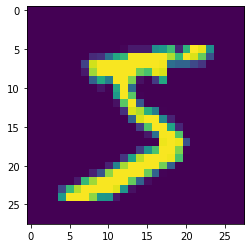

In [71]:
img = X_train[0]
plt.imshow(img);

# Нормализация простейшая

In [30]:
X_train, X_test = X_train / 255., X_test / 255.

# Создание модели

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Вытягиваем данные в одномерный массив output_shape = 28 * 28 = 784
    tf.keras.layers.Dense(128, activation='relu'),  # Полносвязанный слой с 128 нейронами и активацией relu
    tf.keras.layers.Dropout(0.2),  # Рандомно обнуляет выходы из слоя
    tf.keras.layers.Dense(10)  # Выходной слой
])

In [32]:
X_train[:1].shape

(1, 28, 28)

In [33]:
# logit для первой картинки
logit = model(X_train[:1]).numpy()
logit

array([[-0.2205694 , -0.31923598, -0.23434223, -0.5248339 , -0.34180397,
         0.09282494,  0.71495783, -0.06348162,  0.32434833,  0.88565195]],
      dtype=float32)

In [34]:
prob = tf.nn.softmax(logit).numpy()
prob

array([[0.06968663, 0.06313921, 0.06873342, 0.05140544, 0.06173024,
        0.09533555, 0.17760034, 0.0815402 , 0.12017225, 0.2106567 ]],
      dtype=float32)

In [37]:
prob.max(), prob.argmax(), prob.shape

(0.2106567, 9, (1, 10))

# Loss

In [38]:
loss_fn = tf.losses.SparseCategoricalCrossentropy(from_logits=True)  # Кросс энтропия

In [39]:
loss_fn(y_train[:1], logit).numpy()

2.3503523

# Компиляция модели

In [41]:
model.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

# Обучение модели

In [42]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2995 - accuracy: 0.9127
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1430 - accuracy: 0.9576
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1077 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0899 - accuracy: 0.9721
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0757 - accuracy: 0.9760


# Оценка модели

In [46]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0714 - accuracy: 0.9780 - 384ms/epoch - 1ms/step


[0.07138607650995255, 0.9779999852180481]

In [47]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [61]:
prob = probability_model(X_test[:5]).numpy()
prob.shape

(5, 10)

In [65]:
prob

array([[1.27035790e-07, 9.02834572e-08, 1.08426357e-05, 5.42144466e-04,
        1.50517532e-11, 1.86819830e-06, 2.72468493e-14, 9.99437988e-01,
        1.17845630e-07, 6.90000934e-06],
       [3.97225719e-09, 5.03707852e-04, 9.99456346e-01, 3.55390657e-05,
        5.88084337e-14, 4.45997239e-06, 3.34996422e-08, 7.43899820e-12,
        2.31179804e-08, 3.72341860e-14],
       [1.33635388e-06, 9.98059690e-01, 8.84894835e-05, 2.74419017e-05,
        1.78530827e-04, 2.07544545e-05, 1.14299555e-05, 1.25026272e-03,
        3.38730111e-04, 2.33690898e-05],
       [9.99811590e-01, 5.08901012e-11, 1.06545551e-04, 5.42902328e-08,
        8.35606784e-08, 1.68162796e-06, 7.05981563e-07, 1.98351117e-05,
        1.17765175e-09, 5.94958328e-05],
       [2.09631580e-05, 3.57420582e-09, 1.34346010e-05, 1.12203455e-08,
        9.83213902e-01, 4.39737349e-08, 1.91789895e-05, 5.87883696e-05,
        2.34782931e-07, 1.66734643e-02]], dtype=float32)

In [64]:
prob.argmax(axis=1)

array([7, 2, 1, 0, 4])